In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import DBSCAN


In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\task4\\Task04_Synthetic_Accident_Data.csv", parse_dates=['Start_Time'])
df['hour'] = df['Start_Time'].dt.hour
df['dayofweek'] = df['Start_Time'].dt.day_name()
df.head()


,ID,Severity,Start_Time,City,Weather_Condition,Humidity,Visibility,Temperature,Wind_Speed,Sunrise_Sunset,Start_Lat,Start_Lng,Amenity,Bump,Crossing,Give_Way,hour,dayofweek
0,A00000,2,2021-01-01 00:00:00,Chicago,Rain,86.69,9.96,9.97,28.60,Day,33.422680,-110.787508,False,True,False,False,0,Friday
1,A00001,4,2021-01-01 01:00:00,Houston,Snow,55.24,9.82,10.48,2.18,Night,38.096906,-101.218012,True,False,True,False,1,Friday
2,A00002,3,2021-01-01 02:00:00,Phoenix,Thunderstorm,44.19,6.67,38.91,5.97,Day,39.869654,-111.801781,False,False,False,False,2,Friday
3,A00003,2,2021-01-01 03:00:00,Los Angeles,Clear,40.75,8.14,-0.96,10.43,Day,34.228527,-90.502474,True,True,False,False,3,Friday
4,A00004,1,2021-01-01 04:00:00,Phoenix,Clear,35.57,7.29,29.96,18.61,Night,35.058037,-85.929698,True,True,True,True,4,Friday


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2060\2930006186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis', order=sorted(df['hour'].unique()))


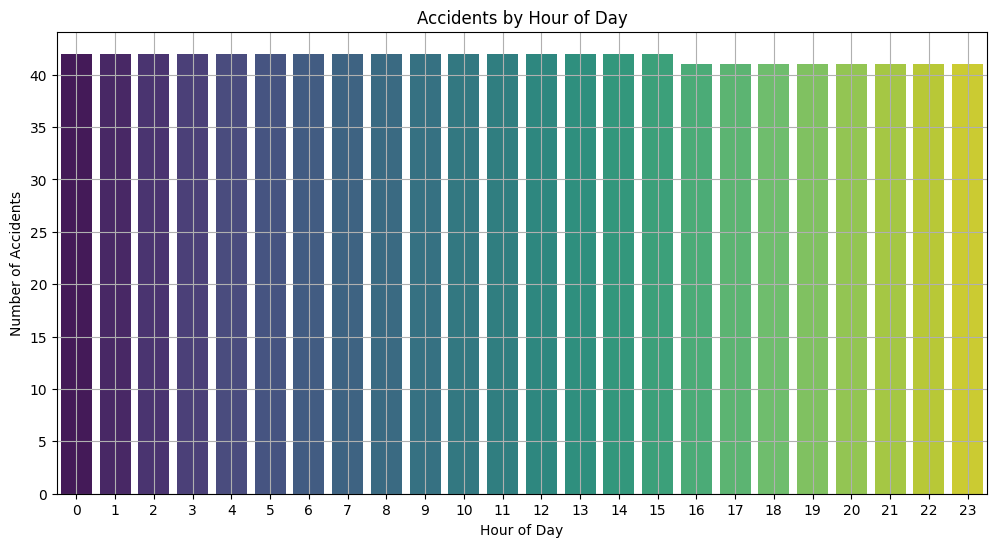

In [3]:
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df, palette='viridis', order=sorted(df['hour'].unique()))
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


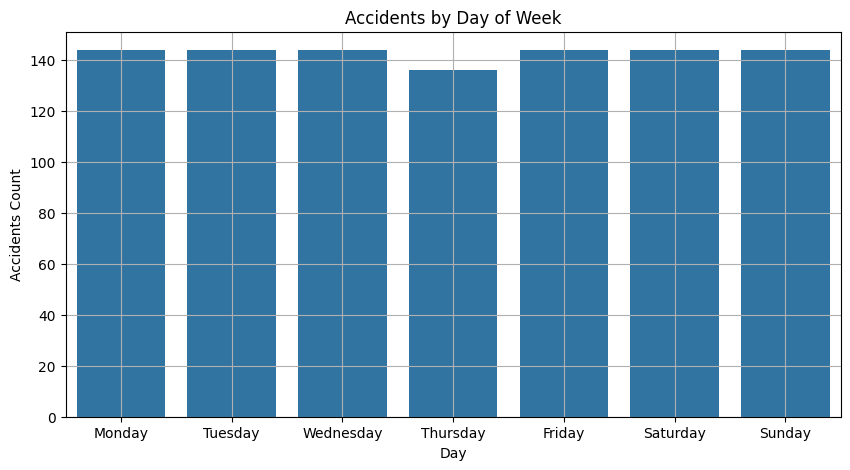

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(x='dayofweek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Accidents Count')
plt.grid(True)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2060\3997699316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')


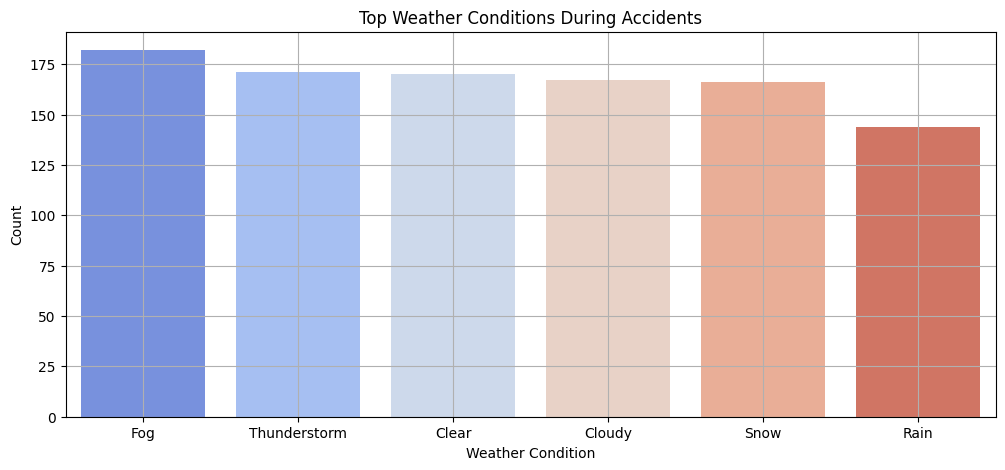

In [5]:
plt.figure(figsize=(12,5))
weather_counts = df['Weather_Condition'].value_counts().nlargest(6)
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')
plt.title('Top Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.grid(True)
plt.show()


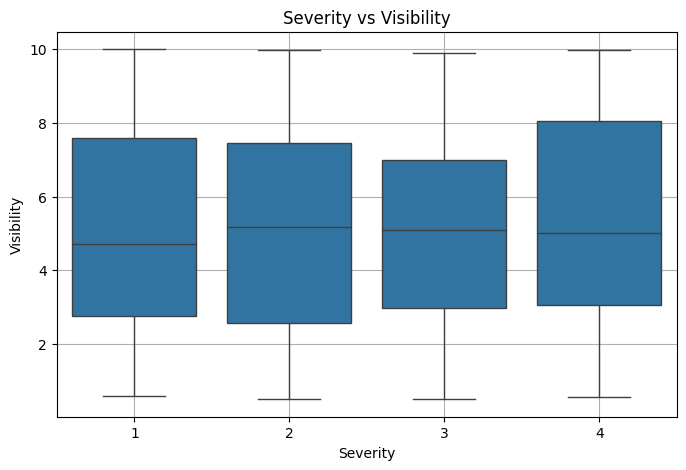

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Visibility', data=df)
plt.title('Severity vs Visibility')
plt.grid(True)
plt.show()


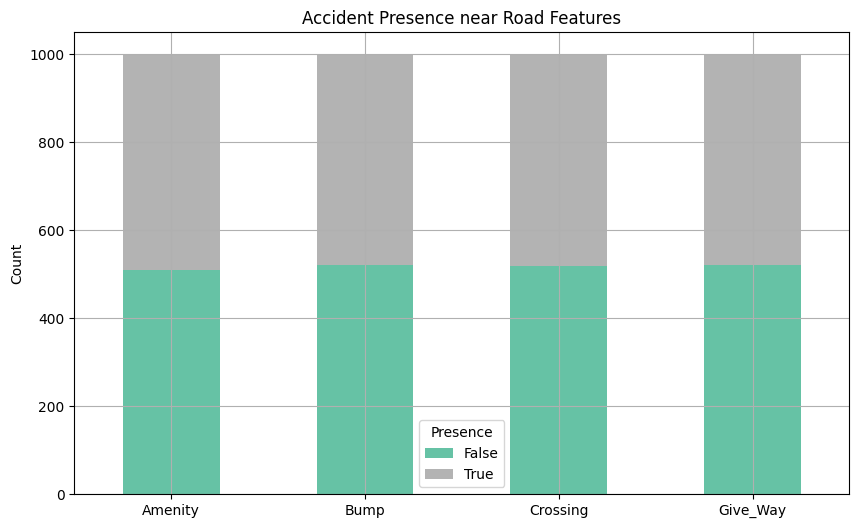

In [7]:
road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way']
road_stats = df[road_features].apply(pd.Series.value_counts)
road_stats.T.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Accident Presence near Road Features')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Presence')
plt.grid(True)
plt.show()


In [9]:
coords = df[['Start_Lat', 'Start_Lng']].dropna()
sampled_coords = coords.sample(500, random_state=42)
kms_per_radian = 6371.0088
epsilon = 1.0 / kms_per_radian

db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine')
labels = db.fit_predict(np.radians(sampled_coords[['Start_Lat', 'Start_Lng']]))
sampled_coords['cluster'] = labels


In [10]:
map_center = [sampled_coords['Start_Lat'].mean(), sampled_coords['Start_Lng'].mean()]
m = folium.Map(location=map_center, zoom_start=5, tiles='CartoDB dark_matter')

for clust in sampled_coords['cluster'].unique():
    if clust == -1:
        continue
    cluster_df = sampled_coords[sampled_coords['cluster'] == clust]
    folium.CircleMarker(
        location=[cluster_df['Start_Lat'].mean(), cluster_df['Start_Lng'].mean()],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup=f'Cluster {clust}, Count: {len(cluster_df)}'
    ).add_to(m)

m.save('Task04_Hotspots_Map.html')
m
